In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [5]:

df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [6]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [8]:
df2.shape


(4803, 23)


## Features

### budget: The budget of the movie in dollars.
### genres: A stringified list of dictionaries that list out all the genres associated with the movie.
### homepage: The Official Homepage of the move.
### id: The ID of the movie.
### imdb_id: The IMDB ID of the movie.
### original_language: The language in which the movie was originally shot in.
### original_title: The original title of the movie.
### overview: A brief blurb of the movie.
### popularity: The Popularity Score assigned by TMDB.
### poster_path: The URL of the poster image.
### production_companies: A stringified list of production companies involved with the making of the movie.
### production_countries: A stringified list of countries where the movie was shot/produced in.
### release_date: Theatrical Release Date of the movie.
### revenue: The total revenue of the movie in dollars.
### runtime: The runtime of the movie in minutes.
### spoken_languages: A stringified list of spoken languages in the film.
### status: The status of the movie (Released, To Be Released, Announced, etc.)
### tagline: The tagline of the movie.
### title: The Official Title of the movie.
### video: Indicates if there is a video present of the movie with TMDB.
### vote_average: The average rating of the movie.
### vote_count: The number of votes by users, as counted by TMDB.

In [9]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [10]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [12]:
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()


,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [13]:
df2 = df2.drop('original_title', axis=1)


In [14]:
df2[df2['revenue'] == 0].shape


(1427, 22)

In [15]:
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')
df2['budget'] = df2['budget'].replace(0, np.nan)
df2[df2['budget'].isnull()].shape

(1037, 22)

In [16]:
# q_movies = df2.copy().loc[df2['vote_count'] >= v]
# q_movies.shape

In [17]:
df2['return'] = df2['revenue'] / df2['budget']
df2[df2['return'].isnull()].shape

(1037, 23)

In [86]:
df2['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [19]:
df2['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
5       [{"iso_3166_1": "US", "name": "United States o...
6       [{"iso_3166_1": "US", "name": "United States o...
7       [{"iso_3166_1": "US", "name": "United States o...
8       [{"iso_3166_1": "GB", "name": "United Kingdom"...
9       [{"iso_3166_1": "US", "name": "United States o...
10      [{"iso_3166_1": "US", "name": "United States o...
11      [{"iso_3166_1": "GB", "name": "United Kingdom"...
12      [{"iso_3166_1": "JM", "name": "Jamaica"}, {"is...
13      [{"iso_3166_1": "US", "name": "United States o...
14      [{"iso_3166_1": "GB", "name": "United Kingdom"...
15      [{"iso_3166_1": "CZ", "name": "Czech Republic"...
16      [{"iso_3166_1": "US", "name": "United States o...
17      [{"iso

In [20]:
df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [21]:
df2['title'] = df2['title'].astype('str')
df2['overview'] = df2['overview'].astype('str')


In [22]:
title_corpus = ' '.join(df2['title'])
overview_corpus = ' '.join(df2['overview'])

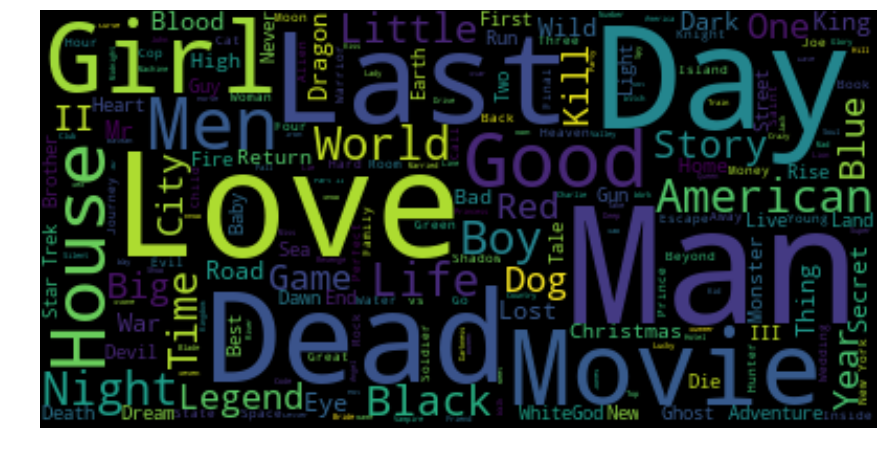

In [23]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(title_corpus)
plt.figure(figsize=(15,15))# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

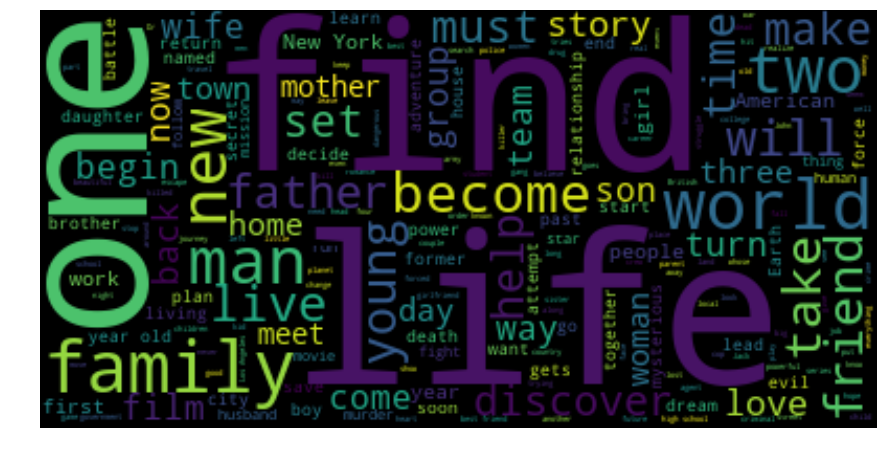

In [24]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(overview_corpus)
plt.figure(figsize=(15,15))# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

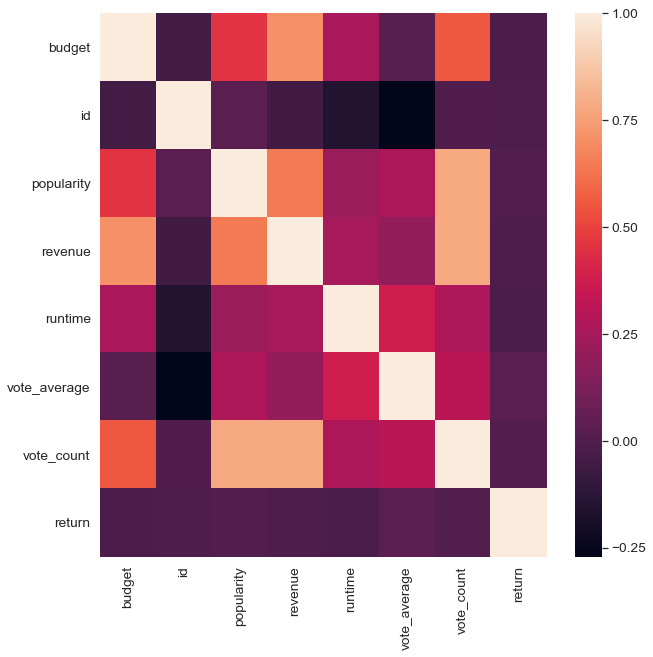

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr())
plt.show()

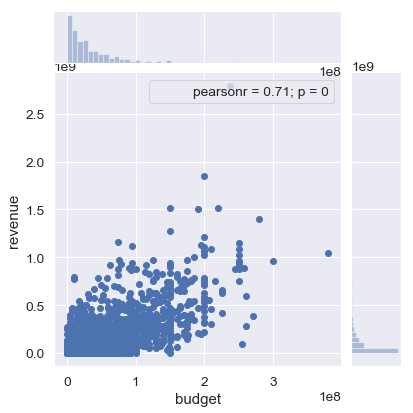

In [26]:
from scipy.stats import pearsonr

sns.jointplot(x='budget', y='revenue', stat_func =pearsonr,data=df2)

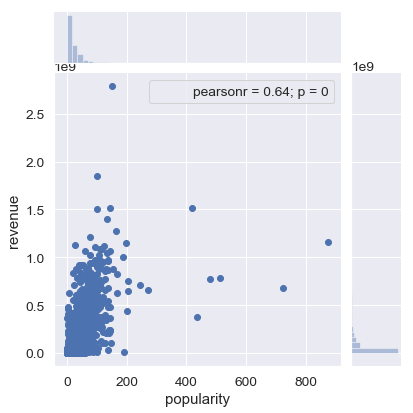

In [27]:

sns.jointplot(x='popularity', y='revenue', stat_func =pearsonr,data=df2)

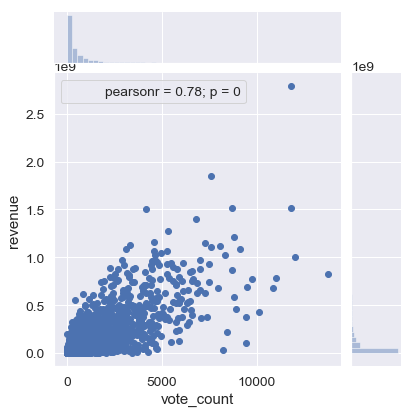

In [28]:

sns.jointplot(x='vote_count', y='revenue', stat_func =pearsonr,data=df2)

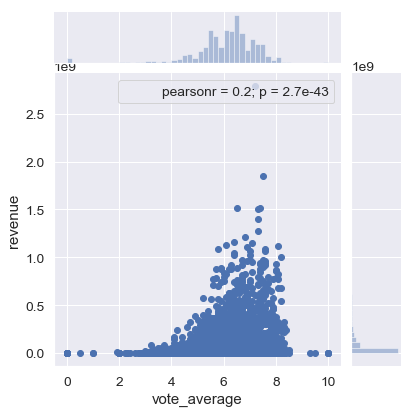

In [29]:
sns.jointplot(x='vote_average', y='revenue', stat_func =pearsonr,data=df2)

In [30]:
df2['production_countries'] = df2['production_countries'].fillna('[]').apply(ast.literal_eval)
df2['production_countries'] = df2['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [31]:
s = df2.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [32]:
con_df = df2.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head()

,num_movies,country
0,3956,United States of America
1,636,United Kingdom
2,324,Germany
3,306,France
4,261,Canada


In [33]:
df2['production_companies'] = df2['production_companies'].fillna('[]').apply(ast.literal_eval)
df2['production_companies'] = df2['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [34]:
# df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
# df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [35]:
s = df2.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [36]:
com_df = df2.drop('production_companies', axis=1).join(s)


In [37]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [38]:
com_pivot.sort_values('Total', ascending=False).head(10)


,Total,Average,Number
Warner Bros.,49155747874,1.540933e+08,319
Universal Pictures,42588465942,1.369404e+08,311
Paramount Pictures,40878523165,1.434334e+08,285
Twentieth Century Fox Film Corporation,39357151309,1.772845e+08,222
Walt Disney Pictures,28683256048,2.516075e+08,114
Columbia Pictures,28599634775,1.422867e+08,201
New Line Cinema,19444865804,1.178477e+08,165
Amblin Entertainment,16090835147,3.283844e+08,49
DreamWorks SKG,14384533626,1.820827e+08,79
Dune Entertainment,13797504190,2.338560e+08,59


In [39]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)


,Total,Average,Number
Pixar Animation Studios,9809792788,6.131120e+08,16
Revolution Sun Studios,8287833697,5.179896e+08,16
Lucasfilm,6606736700,4.404491e+08,15
DreamWorks Animation,12751011861,4.113230e+08,31
Marvel Enterprises,6028164680,3.767603e+08,16
Jerry Bruckheimer Films,7213427769,3.434966e+08,21
Legendary Pictures,11338297127,3.334793e+08,34
Amblin Entertainment,16090835147,3.283844e+08,49
TSG Entertainment,8189981305,3.033326e+08,27
1492 Pictures,5054988252,2.973523e+08,17


In [87]:
df2['original_language'].drop_duplicates().shape


(37,)

In [41]:
lang_df = pd.DataFrame(df2['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,4505,en
fr,70,fr
es,32,es
de,27,de
zh,27,zh


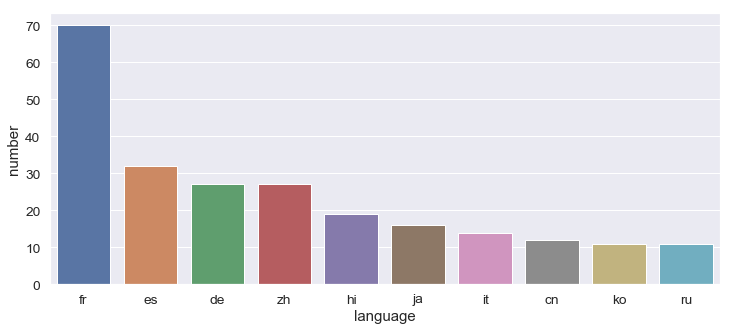

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [43]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [44]:
df2['popularity'] = df2['popularity'].apply(clean_numeric).astype('float')
df2['vote_count'] = df2['vote_count'].apply(clean_numeric).astype('float')
df2['vote_average'] = df2['vote_average'].apply(clean_numeric).astype('float')

In [45]:
df2['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

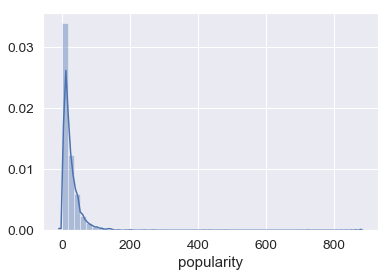

In [46]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].median()))
plt.show()

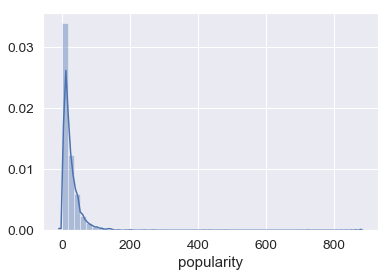

In [88]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].mode()))


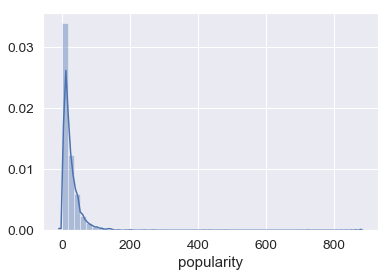

In [89]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].mean()))


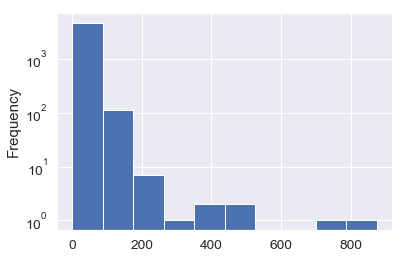

In [47]:
df2['popularity'].plot(logy=True, kind='hist')

In [48]:
df2[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)


,title,popularity,year
546,Minions,875.581305,2015
95,Interstellar,724.247784,2014
788,Deadpool,514.569956,2016
94,Guardians of the Galaxy,481.098624,2014
127,Mad Max: Fury Road,434.278564,2015
28,Jurassic World,418.708552,2015
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003
82,Dawn of the Planet of the Apes,243.791743,2014
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014
88,Big Hero 6,203.734590,2014


In [49]:
df2['vote_count'].describe()


count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [50]:
df2[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)


,title,vote_count,year
96,Inception,13752.0,2010
65,The Dark Knight,12002.0,2008
0,Avatar,11800.0,2009
16,The Avengers,11776.0,2012
788,Deadpool,10995.0,2016
95,Interstellar,10867.0,2014
287,Django Unchained,10099.0,2012
94,Guardians of the Galaxy,9742.0,2014
426,The Hunger Games,9455.0,2012
127,Mad Max: Fury Road,9427.0,2015


In [90]:
most_popular_movies_and_return = df2[['title', 'vote_count', 'year','revenue','return']].sort_values('vote_count', ascending=False)

In [92]:
most_popular_movies_and_return=most_popular_movies_and_return[most_popular_movies_and_return['revenue']>=1000000000]

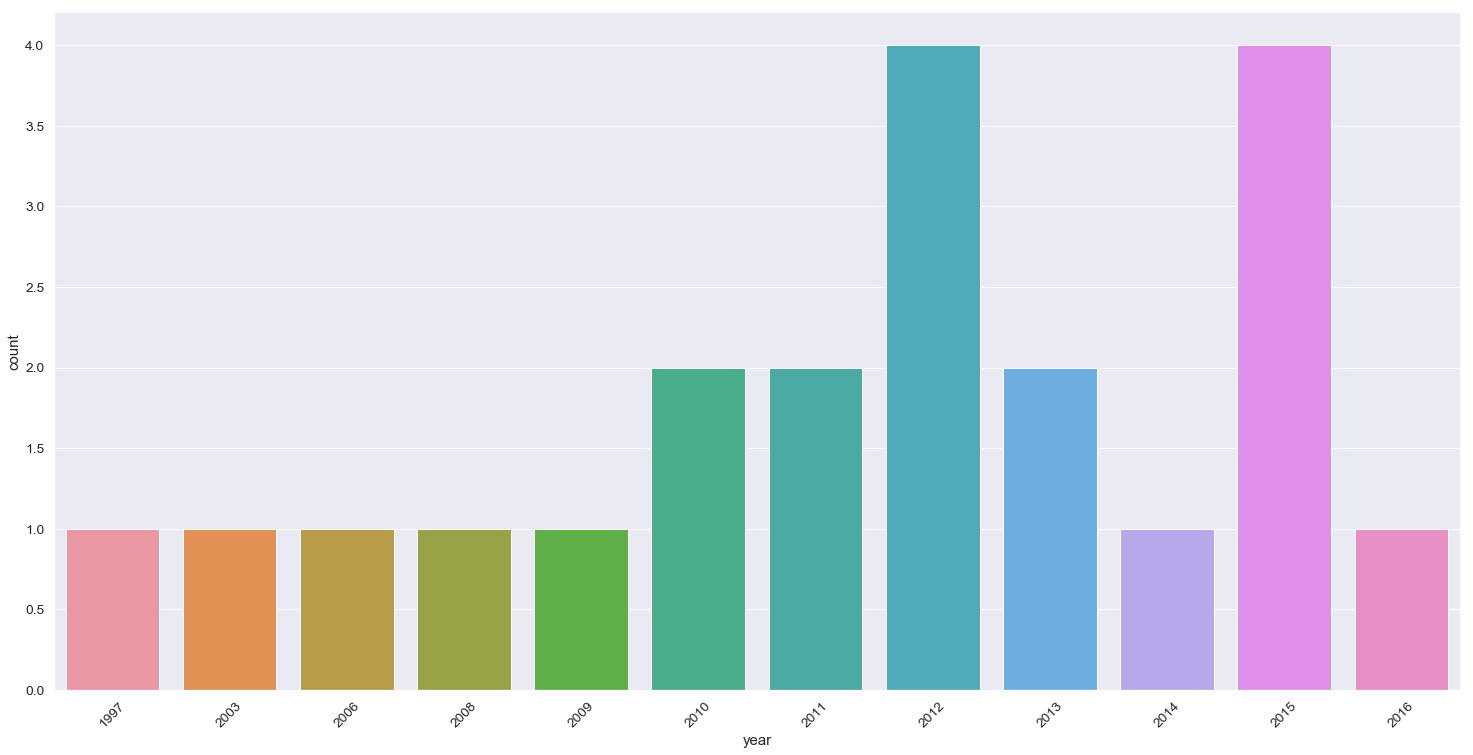

In [96]:
# sns.catplot(x="Surface", data=injury,hue='BodyPart', kind="count")
chart = sns.catplot(x="year", data=most_popular_movies_and_return, kind="count")
chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(24, 12)

## after 1997 (titanic) which was the first movie to cross 1 billion dollar mark , 2012 and 2015 had many movies crossing the billion dollar mark.

In [51]:
df2['vote_average'] = df2['vote_average'].replace(0, np.nan)
df2['vote_average'].describe()

count    4740.000000
mean        6.173143
std         0.972684
min         0.500000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

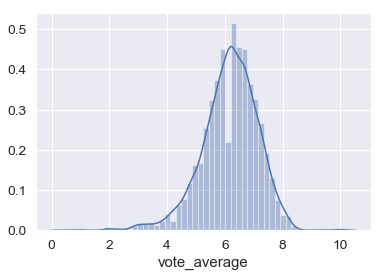

In [52]:
sns.distplot(df2['vote_average'].fillna(df2['vote_average'].median()))


In [53]:
df2[df2['vote_count'] > 3000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,8205.0,1994
3337,The Godfather,8.4,5893.0,1972
3865,Whiplash,8.3,4254.0,2014
2294,Spirited Away,8.3,3840.0,2001
1818,Schindler's List,8.3,4329.0,1993
3232,Pulp Fiction,8.3,8428.0,1994
662,Fight Club,8.3,9413.0,1999
2731,The Godfather: Part II,8.3,3338.0,1974
809,Forrest Gump,8.2,7927.0,1994
690,The Green Mile,8.2,4048.0,1999


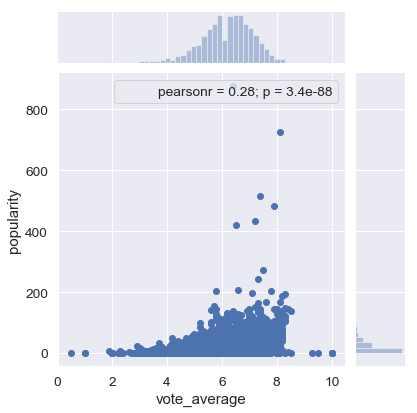

In [54]:

sns.jointplot(x='vote_average', y='popularity', stat_func =pearsonr,data=df2)


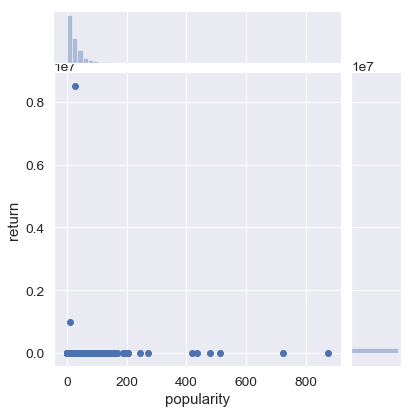

In [97]:
sns.jointplot(x='popularity', y='return', data=df2)


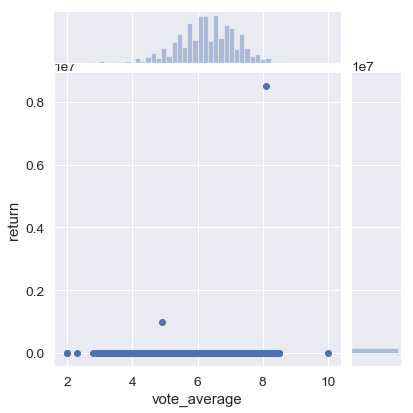

In [99]:
sns.jointplot(x='vote_average', y='return', data=df2)


In [55]:
# sns.barplot(x="popularity", y="revenue", hue='genre',data=df2)

In [56]:
df2['genres'] = df2['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [57]:
s = df2.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [58]:
gen_df = df2.drop('genres', axis=1).join(s)
df2.head()

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,return,year
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009
1,300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007
2,245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,Released,A Plan No One Escapes,Spectre,6.3,4466.0,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015
3,250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012
4,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012


In [59]:
gen_df['genre'].value_counts().shape[0]


20

In [60]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


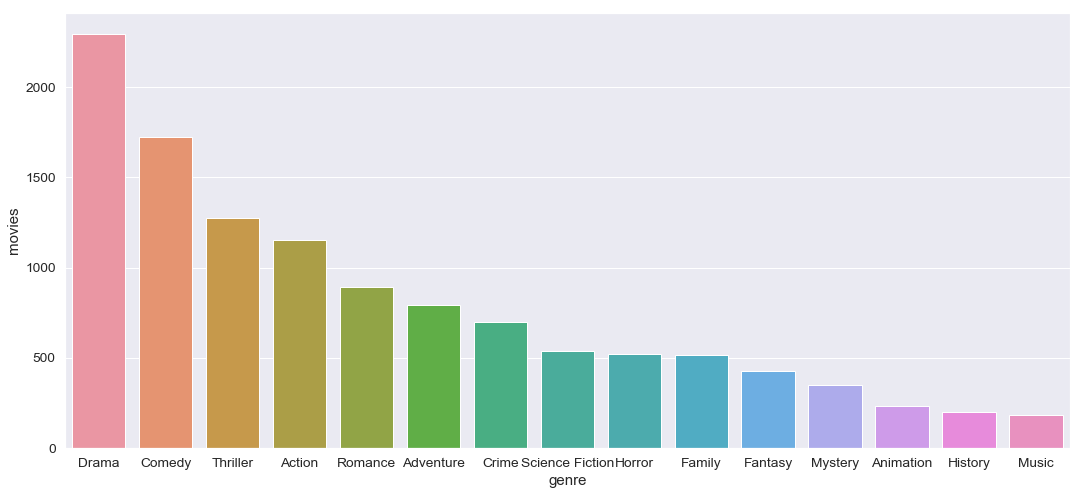

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [62]:
res = df2.set_index(['popularity', 'revenue'])['genres'].apply(pd.Series).stack()
res = res.reset_index()
res.columns = ['popularity','revenue','sample_num','genre']
res.drop('sample_num',axis=1,inplace=True)
res

,popularity,revenue,genre
0,150.437577,2787965087,Action
1,150.437577,2787965087,Adventure
2,150.437577,2787965087,Fantasy
3,150.437577,2787965087,Science Fiction
4,139.082615,961000000,Adventure
5,139.082615,961000000,Fantasy
6,139.082615,961000000,Action
7,107.376788,880674609,Action
8,107.376788,880674609,Adventure
9,107.376788,880674609,Crime


In [63]:
res_400=res[res['revenue']>=400000000]

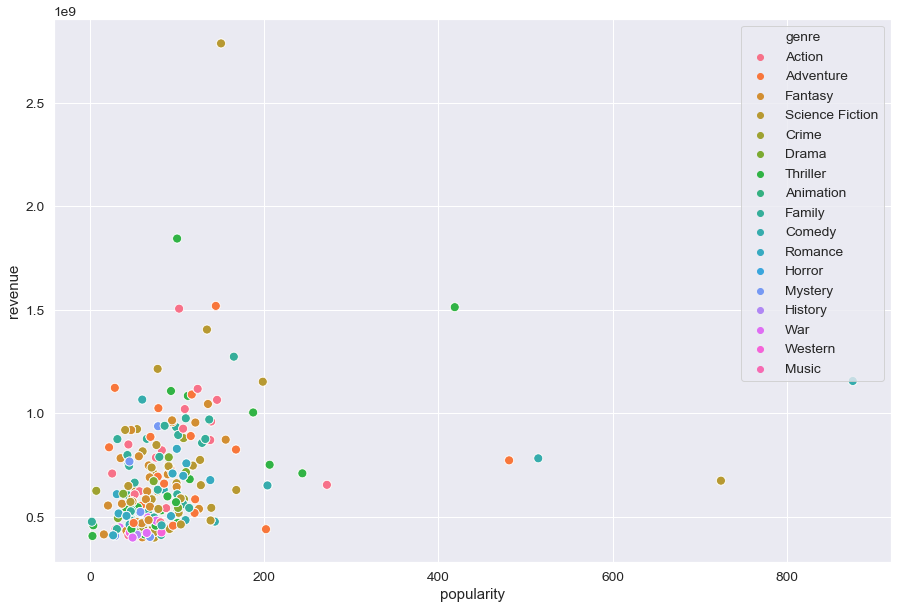

In [64]:
plt.figure(figsize=(15,10 ))
sns.scatterplot(x="popularity", y="revenue", hue='genre',data=res_400,s=80)

<Figure size 1080x720 with 0 Axes>

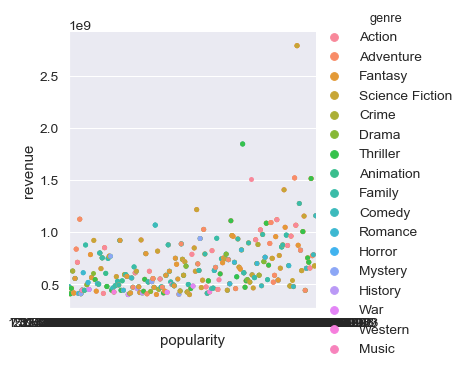

In [65]:
plt.figure(figsize=(15,10 ))
sns.catplot(x="popularity", y="revenue", hue='genre',data=res_400)

In [ ]:
com_df = df2.drop('production_companies', axis=1).join(s)
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [ ]:
com_pivot.sort_values('Total', ascending=False).head(10)


In [68]:
lang_df = pd.DataFrame(df2['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,4505,en
fr,70,fr
es,32,es
de,27,de
zh,27,zh


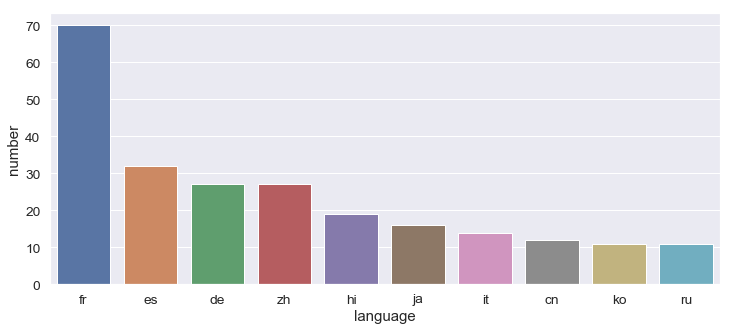

In [69]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [70]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan
df2['popularity'] = df2['popularity'].apply(clean_numeric).astype('float')
df2['vote_count'] = df2['vote_count'].apply(clean_numeric).astype('float')
df2['vote_average'] = df2['vote_average'].apply(clean_numeric).astype('float')

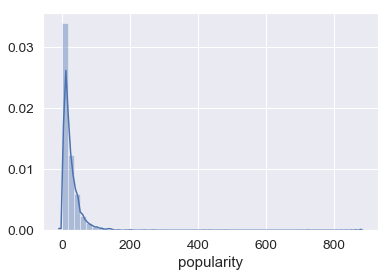

In [72]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].median()))
plt.show()

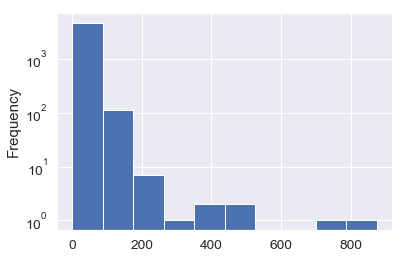

In [73]:
df2['popularity'].plot(logy=True, kind='hist')


In [74]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [75]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [76]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [77]:
df2['day'] = df2['release_date'].apply(get_day)
df2['month'] = df2['release_date'].apply(get_month)

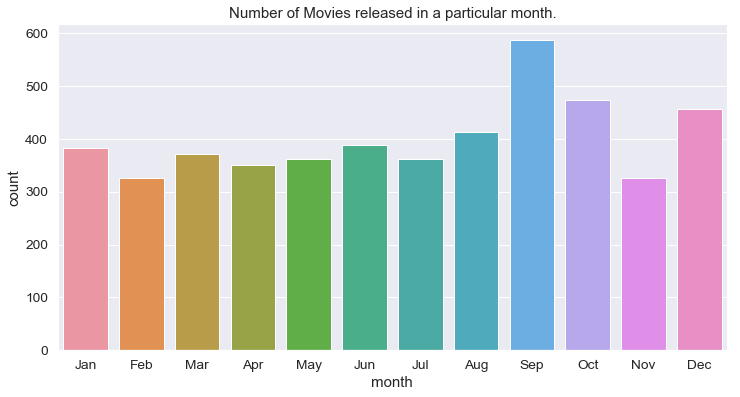

In [79]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df2, order=month_order)

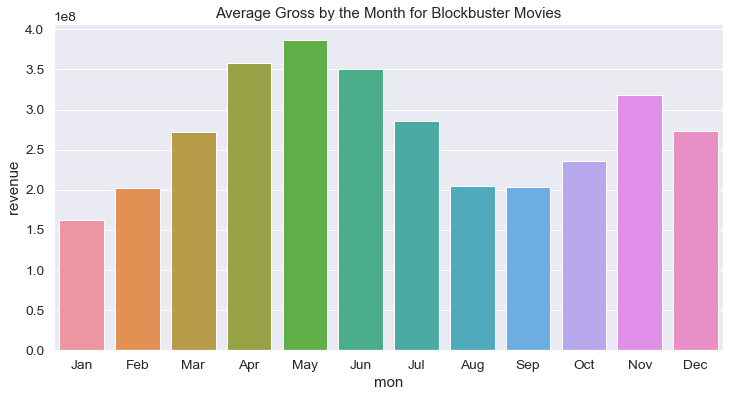

In [80]:
month_mean = pd.DataFrame(df2[df2['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

(0, 12)

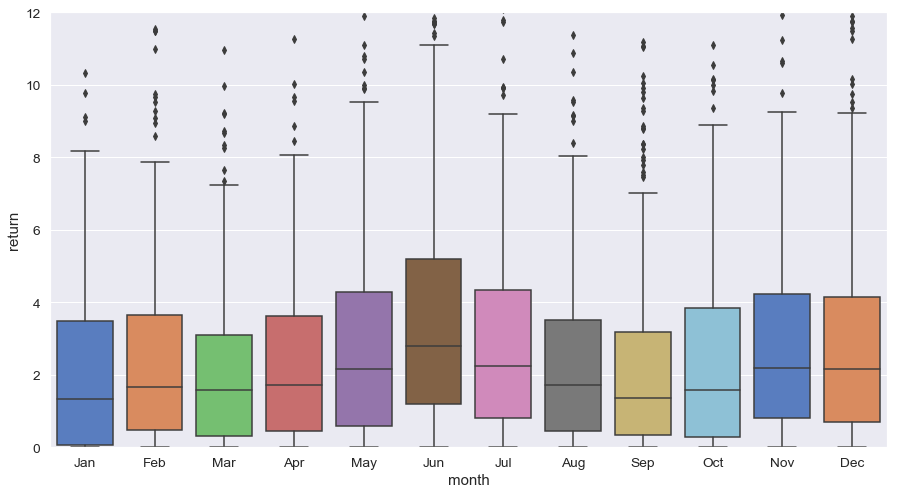

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df2[df2['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

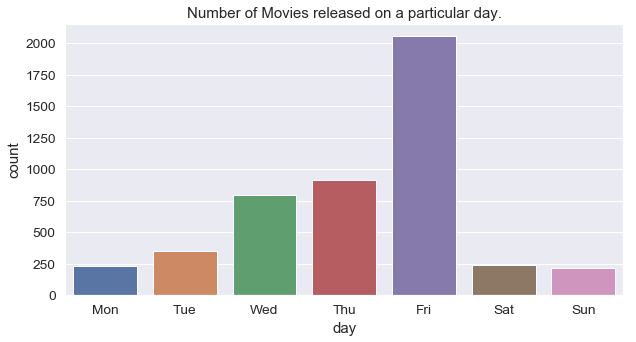

In [82]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df2, order=day_order)

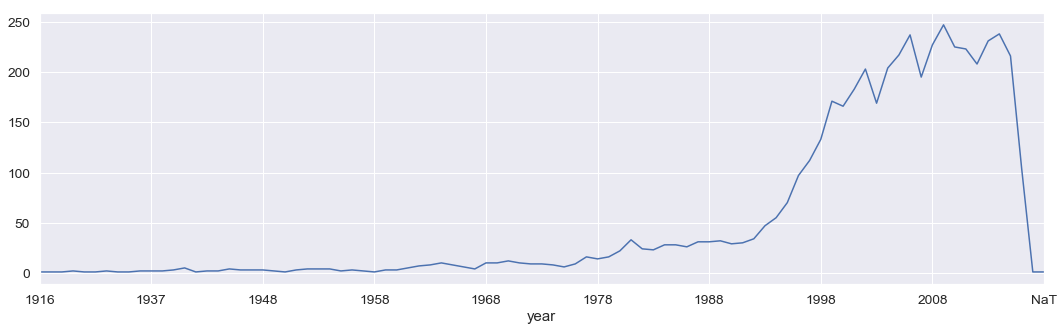

In [83]:
year_count = df2.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [84]:
df2[df2['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)


,title,year
4592,Intolerance,1916
4661,The Big Parade,1925
2638,Metropolis,1927
4594,The Broadway Melody,1929
4457,Pandora's Box,1929
3804,Hell's Angels,1930
3611,A Farewell to Arms,1932
4673,She Done Him Wrong,1933
4570,42nd Street,1933
4604,It Happened One Night,1934


In [85]:
df2[df2['year'] != 'NaT'][['title', 'year']].sort_values('year').tail(10)


,title,year
2379,Restoration,2016
91,Independence Day: Resurgence,2016
1038,The Infiltrator,2016
2388,I Am Wrath,2016
4488,Adulterers,2016
2112,Bad Moms,2016
2109,Me Before You,2016
3081,The Forest,2016
2288,Fight Valley,2016
4255,Growing Up Smith,2017


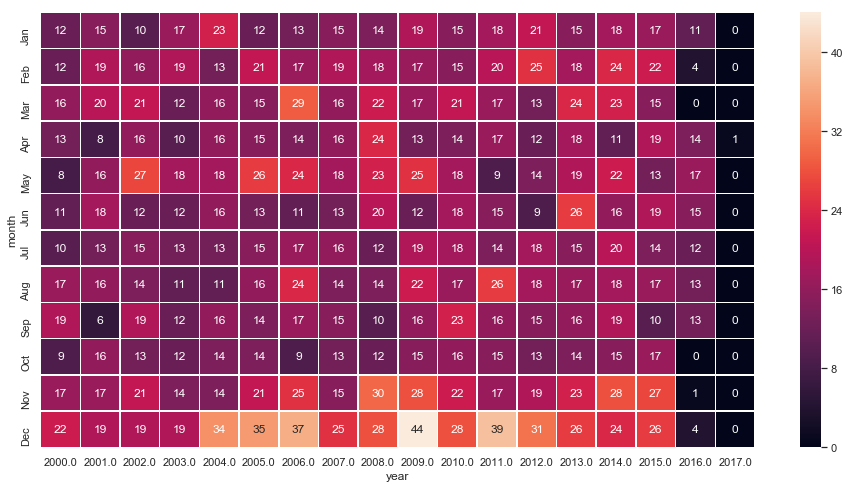

In [100]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_21 = df2.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [101]:
df2['spoken_languages'] = df2['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [102]:
df2['spoken_languages'].value_counts()


1    3355
2     841
3     308
4     133
0      86
5      51
6      19
7       6
8       3
9       1
Name: spoken_languages, dtype: int64

In [105]:
df2[df2['spoken_languages'] >= 6][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
59,2012,2009,9
2384,Carlos,2010,8
1135,Lord of War,2005,8
528,Munich,2005,8
1200,The Living Daylights,1987,7
601,Rollerball,2002,7
2331,Under the Tuscan Sun,2003,7
978,The Life Aquatic with Steve Zissou,2004,7
3512,The Spanish Apartment,2002,7
147,Die Another Day,2002,7


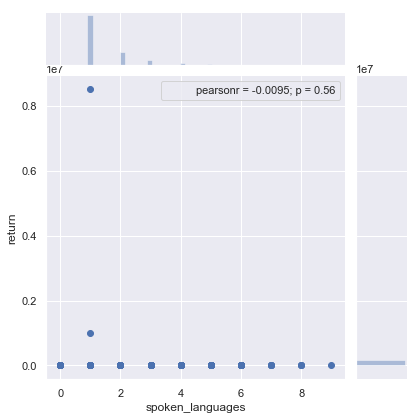

In [106]:
sns.jointplot(x="spoken_languages", y="return", data=df2, stat_func=stats.pearsonr)

negative corelation meaning , there is no relation between number of languages spoken in film and return

In [107]:
df2['runtime'].describe()


count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [108]:
df2['runtime'] = df2['runtime'].astype('float')


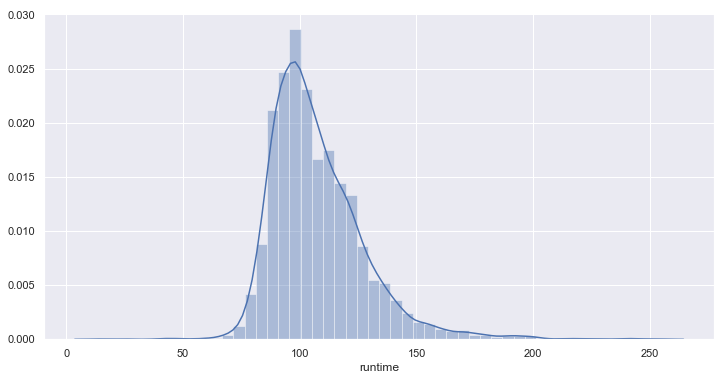

In [109]:
plt.figure(figsize=(12,6))
sns.distplot(df2[(df2['runtime'] < 270) & (df2['runtime'] > 0)]['runtime'])


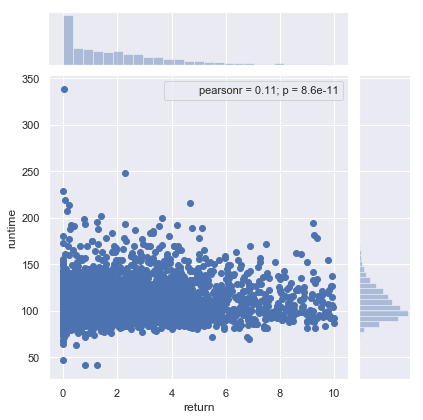

In [112]:
df_runtime_n_return = df2[(df2['return'].notnull()) & (df2['runtime'] > 0) & (df2['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_runtime_n_return,stat_func=stats.pearsonr)
plt.show()

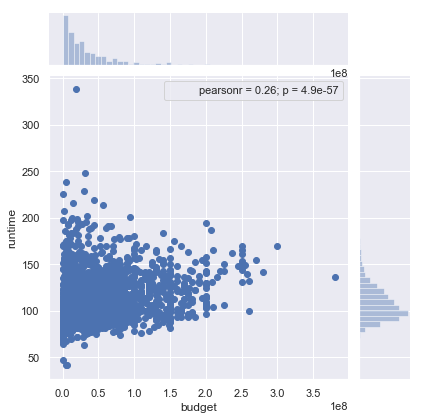

In [114]:
df_mat = df2[(df2['budget'].notnull()) & (df2['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat,stat_func=pearsonr)
plt.show()

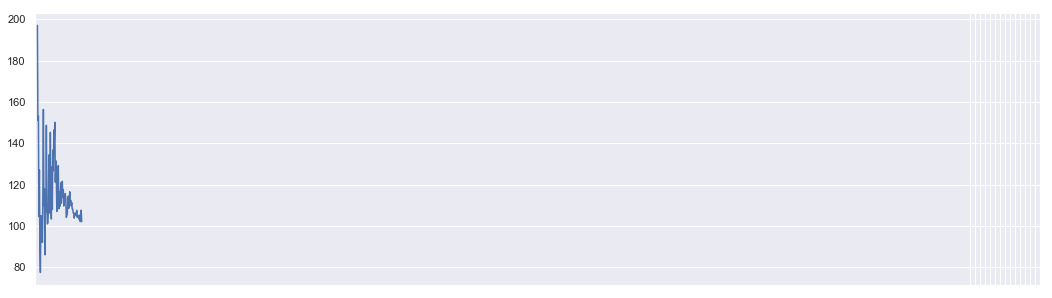

In [115]:
# plt.figure(figsize=(18,5))
# year_runtime = df2[df2['year'] != 'NaT'].groupby('year')['runtime'].mean()
# plt.plot(year_runtime.index, year_runtime)
# plt.xticks(np.arange(1874, 2024, 10.0))
# plt.show()

In [116]:
df2['budget'].describe()


count    3.766000e+03
mean     3.704284e+07
std      4.264651e+07
min      1.000000e+00
25%      8.000000e+06
50%      2.300000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

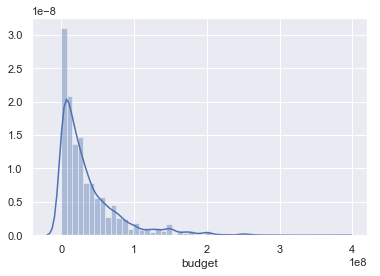

In [117]:
sns.distplot(df2[df2['budget'].notnull()]['budget'])


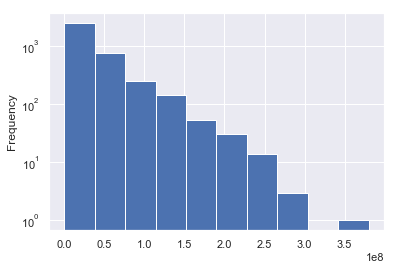

In [118]:
df2['budget'].plot(logy=True, kind='hist')


In [119]:
df2[df2['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17,Pirates of the Caribbean: On Stranger Tides,380000000.0,1045713802,2.751878,2011
1,Pirates of the Caribbean: At World's End,300000000.0,961000000,3.203333,2007
7,Avengers: Age of Ultron,280000000.0,1405403694,5.019299,2015
10,Superman Returns,270000000.0,391081192,1.448449,2006
4,John Carter,260000000.0,284139100,1.092843,2012
6,Tangled,260000000.0,591794936,2.276134,2010
5,Spider-Man 3,258000000.0,890871626,3.452991,2007
13,The Lone Ranger,255000000.0,89289910,0.350157,2013
46,X-Men: Days of Future Past,250000000.0,747862775,2.991451,2014
22,The Hobbit: The Desolation of Smaug,250000000.0,958400000,3.833600,2013


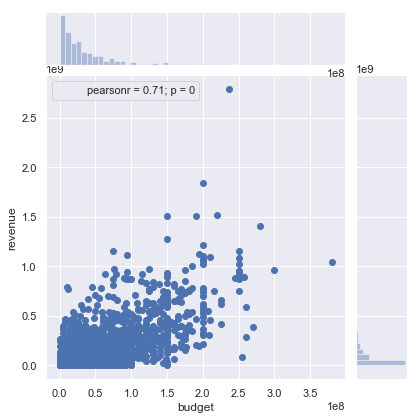

In [121]:
sns.jointplot(x='budget',y='revenue',data=df2[df2['return'].notnull()],stat_func=pearsonr)


we can see a strong corelation between budget and revenue

In [122]:
df2['revenue'].describe()


count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

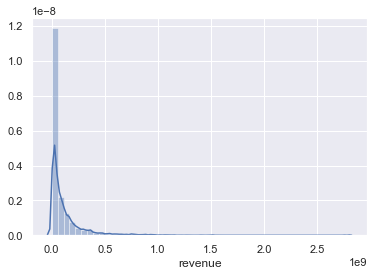

In [123]:
sns.distplot(df2[df2['revenue'].notnull()]['revenue'])


In [125]:
gross_top = df2[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
gross_top

,title,budget,revenue,year
0,Avatar,237000000.0,2787965087,2009
25,Titanic,200000000.0,1845034188,1997
16,The Avengers,220000000.0,1519557910,2012
28,Jurassic World,150000000.0,1513528810,2015
44,Furious 7,190000000.0,1506249360,2015
7,Avengers: Age of Ultron,280000000.0,1405403694,2015
124,Frozen,150000000.0,1274219009,2013
31,Iron Man 3,200000000.0,1215439994,2013
546,Minions,74000000.0,1156730962,2015
26,Captain America: Civil War,250000000.0,1153304495,2016


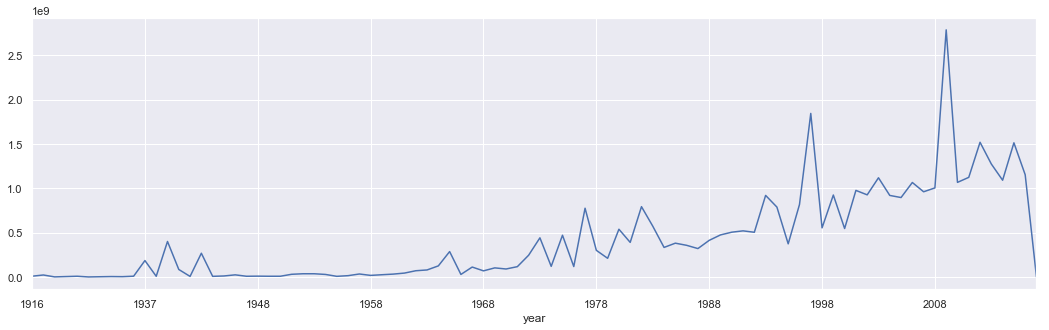

In [142]:
plt.figure(figsize=(18,5))
year_revenue = df2[(df2['revenue'].notnull()) & (df2['year'] != 'NaT')].groupby('year')['revenue'].max()
# plt.plot(year_revenue.index, year_revenue)
# chart = plt.plot(year_revenue.index, year_revenue)
# chart.set_xticklabels(rotation=45)
# plt.gcf().set_size_inches(16, 8)
# plt.show()
year_revenue.plot(kind='line')

In [144]:
df2[(df2['return'].notnull()) & (df2['budget'] > 1e7)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
2967,E.T. the Extra-Terrestrial,10500000.0,792910554,75.515291,1982
2912,Star Wars,11000000.0,775398007,70.490728,1977
2668,Pretty Woman,14000000.0,463000000,33.071429,1990
1990,The Empire Strikes Back,18000000.0,538400000,29.911111,1980
2517,The King's Speech,15000000.0,414211549,27.614103,2010
2511,Home Alone,18000000.0,476684675,26.482482,1990
2838,The Fault in Our Stars,12000000.0,307166834,25.597236,2014
2730,Black Swan,13000000.0,327803731,25.215672,2010
2666,Slumdog Millionaire,15000000.0,377910544,25.194036,2008
2096,The Conjuring,13000000.0,318000141,24.461549,2013


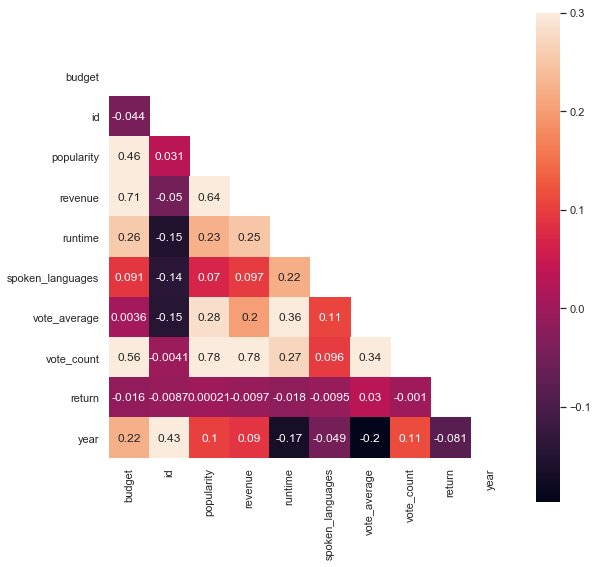

In [145]:
df2['year'] = df2['year'].replace('NaT', np.nan)
df2['year'] = df2['year'].apply(clean_numeric)
sns.set(font_scale=1)
corr = df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [148]:
s = df2.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [149]:
gen_df = df2.drop('genres', axis=1).join(s)


In [150]:
gen_df['genre'].value_counts().shape


(20,)

In [151]:
gen_df['genre'].value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genre, dtype: int64

In [152]:
pop_genre = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_genre.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


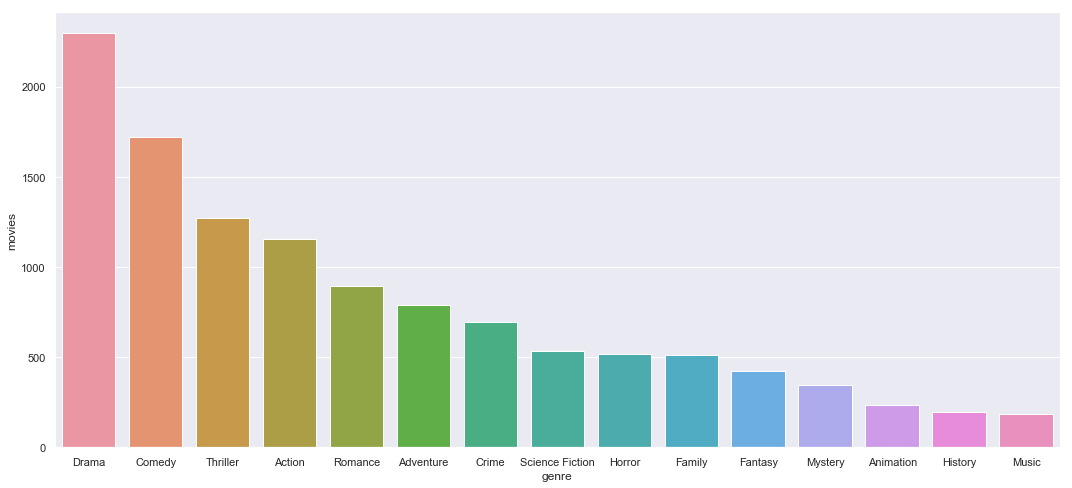

In [153]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

The next question I want to answer is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased? Do certain years have a disproportionate share of Animation Movies? Let's find out!

In [154]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

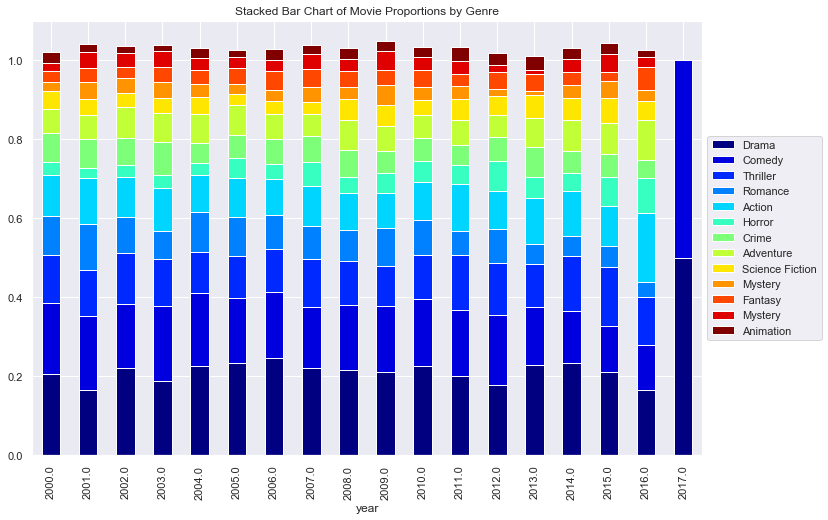

In [157]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

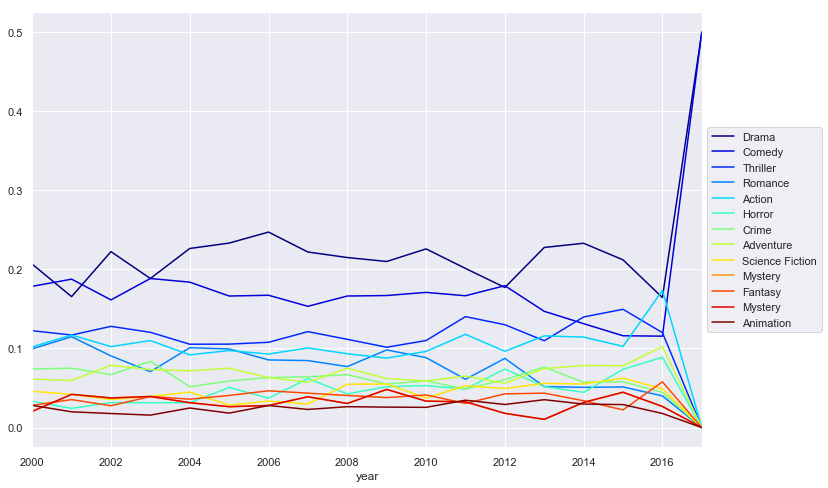

In [158]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [160]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

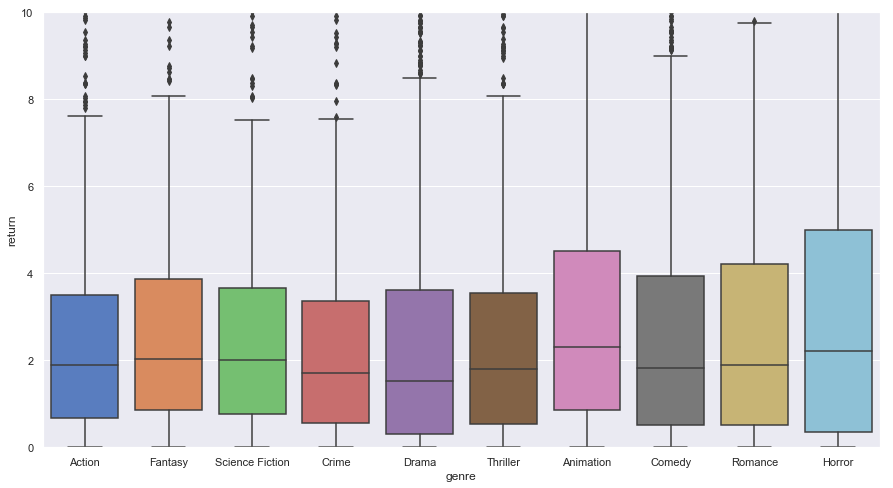

In [161]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

In [162]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [163]:
df2['cast'] = df2['cast'].apply(ast.literal_eval)
df2['crew'] = df2['crew'].apply(ast.literal_eval)
df2['cast_size'] = df2['cast'].apply(lambda x: len(x))
df2['crew_size'] = df2['crew'].apply(lambda x: len(x))

In [164]:
df2['cast'] = df2['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [165]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [169]:
df2['director'] = df2['crew'].apply(get_director)
s = df2.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df2.drop('cast', axis=1).join(s)

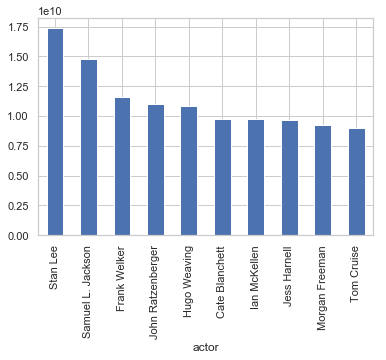

In [170]:
sns.set_style('whitegrid')
# plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

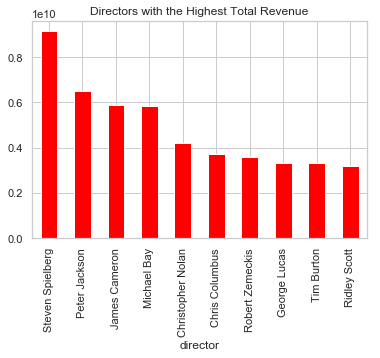

In [172]:
plt.title('Directors with the Highest Total Revenue')
df2.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

In [174]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df2.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

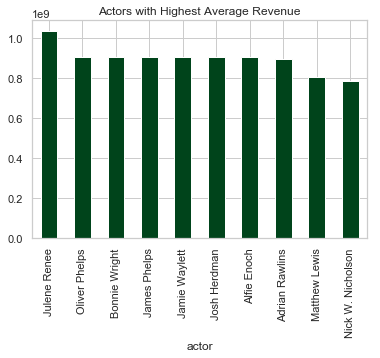

In [175]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

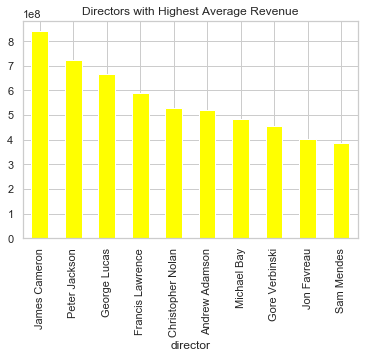

In [176]:
plt.title("Directors with Highest Average Revenue")
df2[df2['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

In [177]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Katie Featherston,2607.306836
Joshua Leonard,1380.575344
P.J. Soles,120.931667
Thomas Mitchell,100.044115
Ward Bond,100.044115
John Larroquette,94.914322
Arthur Malet,71.372155
Charles Cyphers,66.903206
Gino Corrado,55.980201


In [179]:
success_df = df2[(df2['return'].notnull()) & (df2['revenue'] > 1e7) & (df2['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
Tobe Hooper,187.233810
George A. Romero,69.654704
George Lucas,54.328446
George Miller,39.076975
James Wan,32.084662
John Carpenter,29.976842
Guy Hamilton,25.779057
Darren Lynn Bousman,22.851406
William Friedkin,19.799284
